## Data exploration

In [234]:
# load the dataset
import pandas as pd

dataset = pd.read_csv('./dataset/Iris.csv')

In [236]:
# print the dataset
print(dataset)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

                   Mean  Median  Standard Deviation
SepalLengthCm  5.843333    5.80            0.828066
SepalWidthCm   3.054000    3.00            0.433594
PetalLengthCm  3.758667    4.35            1.764420
PetalWidthCm   1.198667    1.30            0.763161


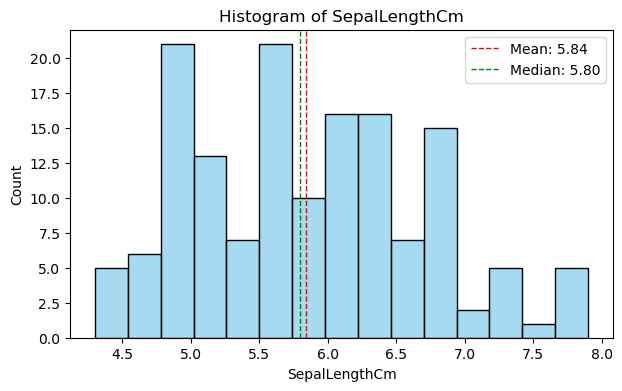

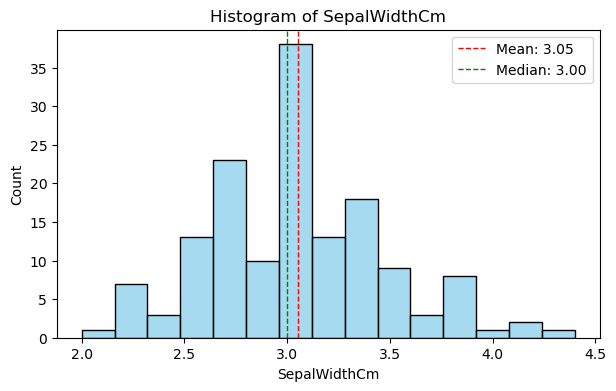

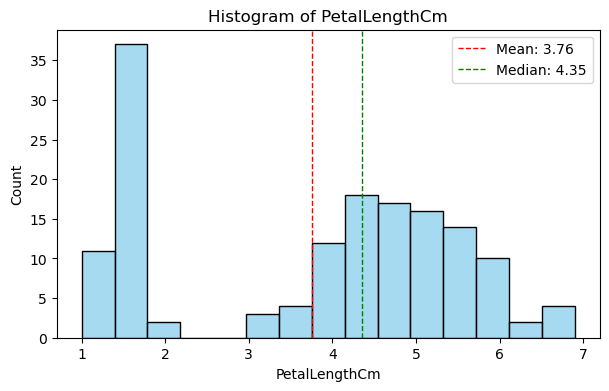

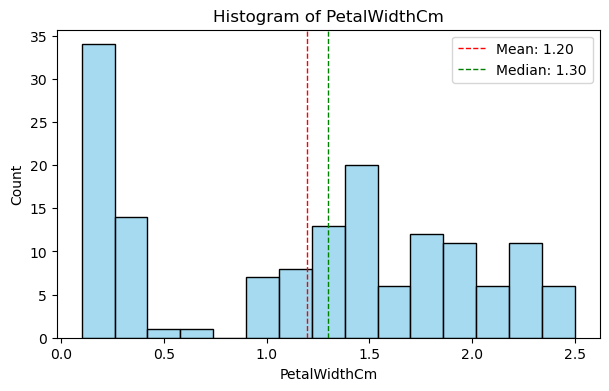

In [238]:
# Calculating basic statistics - mean, median and standard deviation
import numpy as np

# Get the values of the features - SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
mean = dataset.iloc[:, 1:5].mean()
median = dataset.iloc[:, 1:5].median()
std = dataset.iloc[:, 1:5].std()

# Combine into one summary DataFrame
stats_summary = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Standard Deviation': std
})

# Basic statistics of the dataset
print(stats_summary)

for feature in features:
    plt.figure(figsize=(7,4))
    sns.histplot(dataset[feature], bins=15, color='skyblue')
    plt.axvline(mean[feature], color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean[feature]:.2f}")
    plt.axvline(median[feature], color='green', linestyle='dashed', linewidth=1, label=f"Median: {median[feature]:.2f}")
    plt.title(f"Histogram of {feature}")
    plt.legend()
    plt.show()

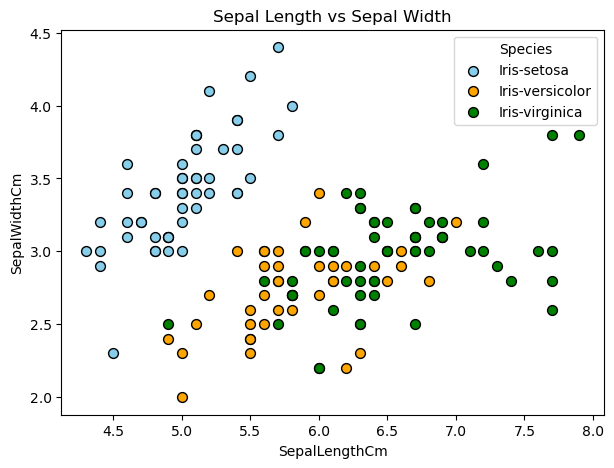

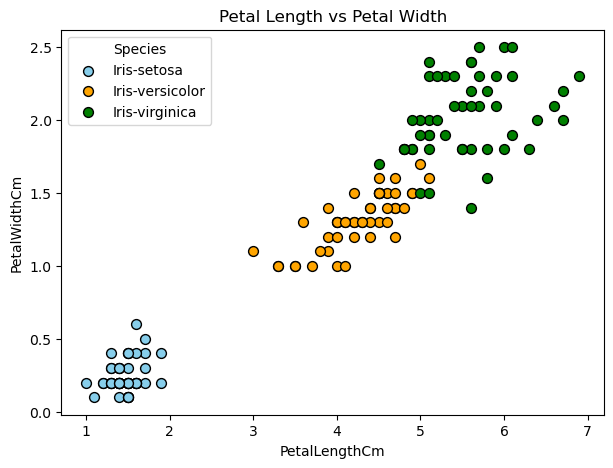

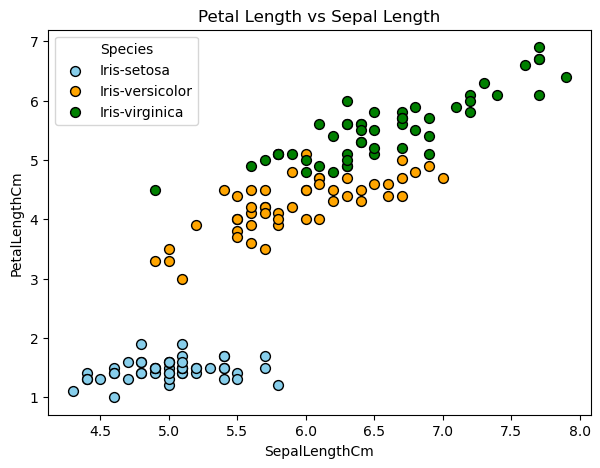

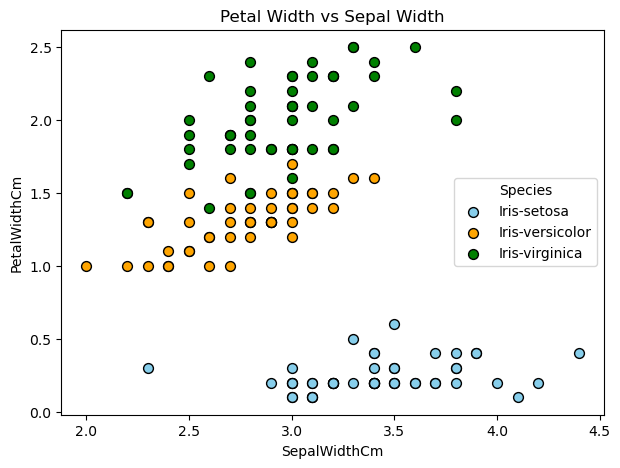

In [239]:
import matplotlib.pyplot as plt

# Define features pairs and titles
scatter_pairs = [
    ("SepalLengthCm", "SepalWidthCm", "Sepal Length vs Sepal Width"),
    ("PetalLengthCm", "PetalWidthCm", "Petal Length vs Petal Width"),
    ("SepalLengthCm", "PetalLengthCm", "Petal Length vs Sepal Length"),
    ("SepalWidthCm", "PetalWidthCm", "Petal Width vs Sepal Width")
]

species = dataset["Species"].unique()
colors = ['skyblue', 'orange', 'green']

# Loop through all scatter plot pairs
for x_feature, y_feature, title in scatter_pairs:
    plt.figure(figsize=(7,5))
    
    for sp, color in zip(species, colors):
        subset = dataset[dataset["Species"] == sp]
        plt.scatter(subset[x_feature], subset[y_feature], 
                    label=sp, color=color, s=50, edgecolor='black')
    
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(title)
    plt.legend(title="Species")
    plt.show()

# Data preprocessing

In [241]:
# Check for missing values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [243]:
from sklearn.preprocessing import LabelEncoder

# split dataset into X and Y
# columns are 0-based index
X = dataset.iloc[:, 1:-2].values

# Encode categorical variables
le = LabelEncoder()

# Fit and transform the target variable
y = le.fit_transform(dataset['Species'])

# Printing to ensure everything is correct
print(X)
print(y)

# Get mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

# Split the dataset. 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.1 1.5]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

# Model building

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# build the classifier with max_depth hyperparameter as it works well with datasets like iris
clf = DecisionTreeClassifier(
    max_depth=3, random_state=42
)

# Model training

In [251]:
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation

In [254]:
# Calculate metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## Hyperparameter Tuning

In [257]:
# Try different max_depth values
for depth in [1, 2, 3, 4, 5]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print results
    print("*************")
    print(f"max_depth={depth}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("*************")

*************
max_depth=1
Accuracy: 0.7111111111111111
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0 13  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      1.00      0.67        13
           2       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45

*************
*************
max_depth=2
Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted 

C:\Users\ACER\anaconda3\envs\test2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\envs\test2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\envs\test2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Summary and reflection



* The dataset consists of 150 rows and 6 columns. Among the columns, it appears SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm are the features (x) that lets us to classify the Iris. Species column is the target variable (y).

### Summary of basic statistics - mean, median and standard deviation
1. SepalLengthCm:
   * Mean = 5.84, Median = 5.80, Std Dev = 0.83. Mean and median values are very close, so, balance data distribution. Since the standard deviation is small, the values are spread near mean. So, it is a consistent feature across species.
2. SepalWidthCm:
   * Mean = 3.05, Median = 3.00, Std Dev = 0.43. It appears to be a balanced data as mean is close to the median value. Std Dev is quite small, so values don’t vary much.  So, it is a consistent feature across species.
3. PetalLengthCm:
   * Mean = 3.76, Median = 4.35, Std Dev = 1.76. Here, mean is less than median. Therefore, distribution may be slightly left-skewed. As standard deviation is high, it indicates large variability among species. It's a distinct feature across species as some Iris' petal lengths are short and large. Key feature.
4. PetalWidthCm:
   * Mean = 1.20, Median = 1.30, Std Dev = 0.76. Here, the mean is little bit less than median, which means that distribution is slightly left-skewed. Values are spread across the petal width. So, it's a distinct feature across species.
  
#### Scatter plots
1. Sepal Length vs Sepal Width
   * The sepal length and width of Iris setosa are noticeably different from those of the other Iris species
2. Petal Length vs Petal Width
   * Similar to Sepal Length vs Sepal Width, Iris setosa is distinct from other two types.
3. Petal Length vs Sepal Length
   * Same as previous comparisons, Iris setosa is distinct than other types.
4. Petal Width vs Sepal Width
   * Same as previous comparisons, Iris setosa is distinct than other types.
  
### Data preprocessing
* It appears that there are no missing values.
* I have splitted the features as x and species as the target variable y.
* I label encoded the Species. So, the mapping is Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2

### Model building
* We already know the species labels (Setosa, Versicolor, Virginica)
* Since the goal is usually to predict species from features, I think this is a classification problem.
* To solve this, I'm selecting the decision tree as it's a basic algorithm, works well in the datset like we have and easy to interpret
* As for the hyperparameter, I have selected max_depth as it might capture the Iris types effectively, and works well for this small dataset

### Evaluation
* The accuracy comes as 0.97
* As per the classification matrix we got:
      * All 19 Iris-setosa samples were correctly classified
      * Out of 13 true Iris-versicolor samples, 12 were classified correctly, and 1 was misclassified as Iris-virginica
      * All 13 Iris-virginica samples were correctly predicted

### Hyperparameter
* In the hyperparameter section, I have modified the max_depth from 1,2,3,4,5
* As per the results, it appears that max_depth values 2,3, and 4 produces similar results.
* I think, since the dataset that we have contain only 150 samples, the results are coming the same way for max_depth values 2,3, and 4.
* While running this hyperparameter experiment, I noted this error 'UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.'. I think the likely reason is that the model is overfitting due to the small size of the dataset.

Please find the GitHub repository link for this assignment 1: https://github.com/ThanoshanMV/Machine-Learning-Coding-Skills-Refresher